**SUBMITTED BY:-**

**NAME: TANISHA BANSAL**

**BATCH: CSE-AI - 2 (2026)**

**ROLL NO: 14301172022**

**ASSIGNMENT - 3 (DEEP LEARNING)**





**Q. Write a program to implement Artificial Neural Network for MNIST dataset.**

In [1]:
pip install tensorflow matplotlib


In [3]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
# Loading MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalizing the data (pixel values are between 0 and 255, so we will scale them between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [6]:
# Reshaping data to fit the input of the neural network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# Building the Artificial Neural Network (ANN)
model = models.Sequential()

In [8]:
# Now, we will Input layer (and Flatten the 28x28 images into a 1D vector of 784 values)
model.add(layers.Flatten(input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# This will be our Hidden layer with 128 neurons and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

In [10]:
# This will be our Output layer with 10 neurons (one for each digit) and softmax activation
model.add(layers.Dense(10, activation='softmax'))


In [11]:
# Now, we will be Compiling this model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Now, we will train this model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8751 - loss: 0.4367 - val_accuracy: 0.9575 - val_loss: 0.1411
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9624 - loss: 0.1264 - val_accuracy: 0.9687 - val_loss: 0.1002
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9755 - loss: 0.0835 - val_accuracy: 0.9716 - val_loss: 0.0937
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9823 - loss: 0.0614 - val_accuracy: 0.9748 - val_loss: 0.0777
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9755 - val_loss: 0.0806


In [13]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0910

Test accuracy: 0.9754999876022339


In [14]:
# Now, we are going to plot the accuracy and loss
def plot_history(history):
    # Plotting training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

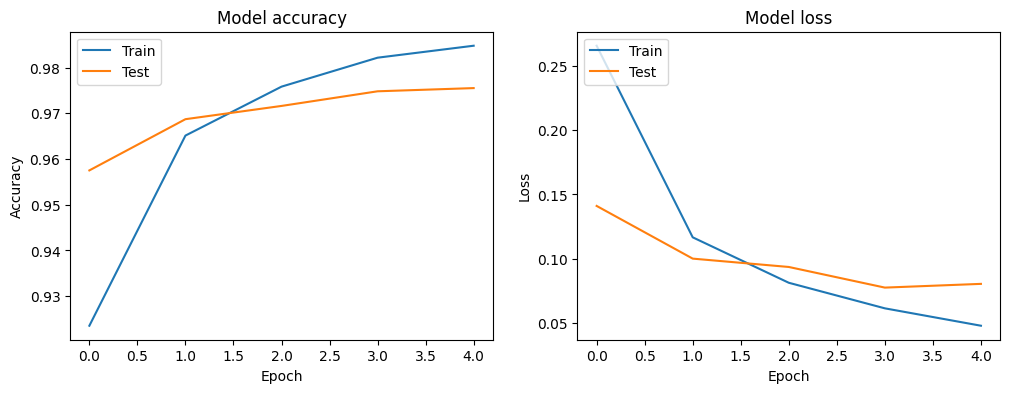

In [15]:
# Plot training history
plot_history(history)

In [16]:
# we can also perform data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)


In [17]:
# now, during training, we will replace the model.fit with
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
   5/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7577 - loss: 1.1336   

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8771 - loss: 0.4245 - val_accuracy: 0.9706 - val_loss: 0.0959
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9388 - loss: 0.2045 - val_accuracy: 0.9730 - val_loss: 0.0863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9489 - loss: 0.1723 - val_accuracy: 0.9743 - val_loss: 0.0843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9503 - loss: 0.1631 - val_accuracy: 0.9768 - val_loss: 0.0721
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9538 - loss: 0.1516 - val_accuracy: 0.9773 - val_loss: 0.0726


In [18]:
# we can also perform model regulation
# Adding a dropout layer to the model
model.add(layers.Dropout(0.2))
# Dropout 20% of the neurons after the hidden layer

# Adding L2 regularization to the dense layers
from tensorflow.keras import regularizers
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))


In [20]:
# we can also normalize it
model.add(layers.BatchNormalization())
